Read in packages

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import rioxarray
import ipywidgets as widgets
from IPython.display import display, clear_output
from IPython.display import Image as IPImage, display as IPdisplay
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [347]:
# Set the path to your image folder
image_folder = '/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_training_85'

# Get a list of image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('tif'))]

#read in pdf of data I have done
done = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_poly_check.csv')

# print(len(image_files))

#all ids done
done_ids = done['Image'].unique()

#remove done ids
image_files = [i for i in image_files if i not in done_ids]

# print(len(image_files))
def display_image(index):
    image_path = os.path.join(image_folder, image_files[index])
    # image = plt.imread(image_path)
    img = rioxarray.open_rasterio(os.path.join(image_path)).to_numpy()
    
    #dnbr
    dnbr = img[0, :, :]

    #y
    y = img[-1, :, :]

    #plot side by side
    fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 4))

    #plot y
    im = ax[0].imshow(y, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin= 0, vmax=1)
    # ax[0,0].title.set_text('Fire')
    ax[0].title.set_text('y')

    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    #plot2
    # im2 = ax[0,1].imshow(in_mat[:, :, 0]/1000, origin = 'lower', cmap = 'Blues', aspect= 'auto')
    im2 = ax[1].imshow(dnbr, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin=-800, vmax=1000)
    # ax[0,1].title.set_text('B1-Ultra Blue')
    ax[1].title.set_text('dNBR')
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')

    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    
    # Use IPython.display to show the figure in the notebook
    display(fig)
    plt.close(fig)  # Close the figure to avoid displaying it twice
    # plt.show()
    
    
#----if initiating a csv 
# def on_button_clicked(b):
#     global current_index, keep_df
#     decision = b.description
#     keep_df = pd.concat([keep_df, pd.DataFrame({'Image': [image_files[current_index]], 'Keep': [decision]})])
#     next_image()


#if a csv is loaded in and being appended to
def on_button_clicked(b):
    global current_index, keep_df, done
    decision = b.description
    image_id = image_files[current_index]
    
    # Append new data to the done dataframe
    done = pd.concat([done, pd.DataFrame({'Image': [image_id], 'Keep': [decision]})])
    
    # Save the updated done dataframe to the CSV file
    done.to_csv('/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_poly_check.csv', index=False)
    
    next_image()
    


def next_image():
    global current_index
    clear_output(wait=True)
    current_index += 1
    if current_index < len(image_files):
        display_image(current_index)
        display_buttons()
    else:
        print("All images reviewed. DataFrame:")
        print(keep_df)
        

def display_buttons():
    # Create Yes and No buttons
    yes_button = widgets.Button(description="Yes")
    no_button = widgets.Button(description="No")
    maybe_button = widgets.Button(description="Maybe")


    # Connect button callbacks
    yes_button.on_click(on_button_clicked)
    no_button.on_click(on_button_clicked)
    maybe_button.on_click(on_button_clicked)

    # Display buttons
    buttons = widgets.HBox([yes_button, no_button, maybe_button])
    display(buttons)

    
    
# Initialize variables
current_index = 0
keep_df = pd.DataFrame(columns=['Image', 'Keep'])

all_indexes = np.arange(0, len(image_files) + 1)

# for current_index in all_indexes:
    
    # Display the first image and buttons
display_image(current_index)
display_buttons()


       



IndexError: list index out of range

In [345]:
next_image()

All images reviewed. DataFrame:
Empty DataFrame
Columns: [Image, Keep]
Index: []


In [349]:
done2 = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_poly_check.csv')

done2.shape

(19156, 2)

In [350]:
done2['Keep'].value_counts(normalize=True) * 100

Keep
Yes      40.410315
No       30.324702
Maybe    29.264982
Name: proportion, dtype: float64

In [348]:
len(image_files)

0

In [356]:
#now just keep ids and save, will use this in EE to vizualize
done = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_poly_check.csv')

done['Image'] = done['Image'].str.split('_').str[1].str.split('.').str[0]

done.to_csv('/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_poly_check_ee.csv', index = False)

I want to look at the variability in fire size in the three classes

In [12]:
df = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_poly_check_ee.csv')

df = df.rename(columns = {'Image': 'ID'})

df = df[df['ID'] .isin (['29690000000000-0000000000', '29690000000000-0000023296']) == False]

df['ID'] = df['ID'].astype(int)

# #shapefile
in_shape = gpd.read_file('/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_polygons.shp')

in_shape['geometry'] = in_shape['geometry'].apply(lambda geom: geom.wkt)

# Now, convert the GeoDataFrame to a Pandas DataFrame
in_shape = pd.DataFrame(in_shape)
in_shape = in_shape[['Year', 'ID', 'area']]

in_shape.head()

#left join
in_shape = pd.merge(in_shape, df, on = 'ID', how = 'inner')

in_shape.head()


/tmp/ipykernel_1637960/3917549008.py:12: UserWarning: Geometry column does not contain geometry.
  in_shape['geometry'] = in_shape['geometry'].apply(lambda geom: geom.wkt)


,Year,ID,area,Keep
0,2001.0,0,2.67227,Maybe
1,2001.0,1,3.82018,Yes
2,2001.0,2,40.10380,Yes
3,2001.0,3,45.77630,Yes
4,2001.0,4,34.63120,Maybe


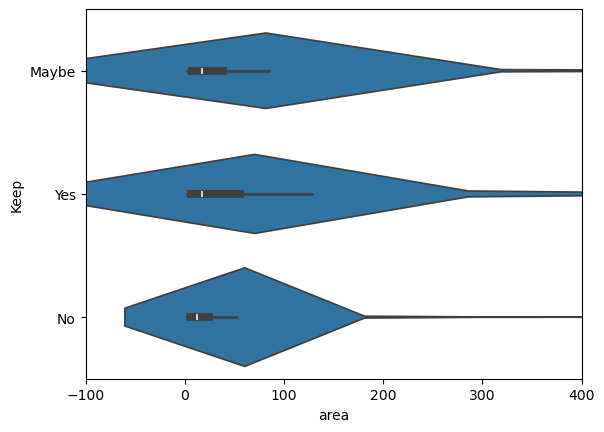

In [17]:
sns.violinplot(y='Keep', x='area', data=in_shape, inner='box')

# Display the plot
# plt.title('Violin Plot of Area by Keep Category with Inner Boxplot')
plt.xlim(-100, 400)

plt.show()

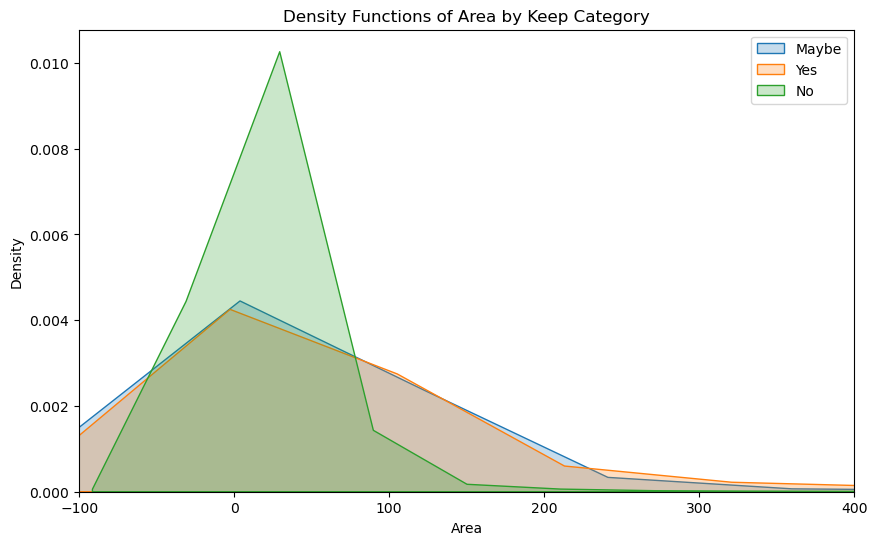

In [21]:

df = in_shape.copy()
# Setting up the plot
plt.figure(figsize=(10, 6))

# Plotting density functions for each category in 'Keep'
for category in df['Keep'].unique():
    subset = df[df['Keep'] == category]
    sns.kdeplot(subset['area'], label=category, fill=True)

# Limit the x-axis to 1000
plt.xlim(-100, 400)

# Adding labels and title
plt.xlabel('Area')
plt.ylabel('Density')
plt.title('Density Functions of Area by Keep Category')
plt.legend()

# Display the plot
plt.show()

In [20]:
in_shape.shape

(19154, 4)

In [22]:
df['area'].min()

1.98663

In [34]:
# #shapefile
in_shape = gpd.read_file('/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_polygons.shp')

in_shape['Year'] = in_shape['Year'].astype(int)

remove = in_shape[in_shape['Year'] .isin ([2015, 2019])]
remove.head()

remove = remove[remove['ID'] .isin (['29690000000000-0000000000', '29690000000000-0000023296']) == False]
remove['ID'] = remove['ID'].astype(str) + '.npy'

remove = remove['ID'].tolist()

def filter_items_by_ending(original_list, unwanted_endings):
    """
    Filters out items from the original list that end with any of the specified unwanted endings.
    
    Parameters:
    - original_list: List of strings to be filtered.
    - unwanted_endings: List of string endings based on which items will be removed from the original list.
    
    Returns:
    - List of filtered items not ending with any of the unwanted endings.
    """
    # Use list comprehension to filter out unwanted items
    return [item for item in original_list if not any(item.endswith(ending) for ending in unwanted_endings)]



training_names = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_good_training_files.csv')['Files'].tolist()

print(len(training_names))

training_names = filter_items_by_ending(training_names,remove)


print(len(training_names))

171803
154670


In [35]:
def keep_items_by_ending(original_list, wanted_endings):
    """
    Keeps only the items from the original list that end with any of the specified wanted endings.
    
    Parameters:
    - original_list: List of strings to be filtered.
    - wanted_endings: List of string endings based on which items will be kept in the original list.
    
    Returns:
    - List of items ending with any of the wanted endings.
    """
    # Use list comprehension to filter and keep wanted items
    return [item for item in original_list if any(item.endswith(ending) for ending in wanted_endings)]

training_names = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_good_training_files.csv')['Files'].tolist()

print(len(training_names))

training_names = keep_items_by_ending(training_names,remove)


print(len(training_names))

171803
17133
